## Multivariate Analysis of Variance (MANOVA)

**Multivariate Analysis of Variance (MANOVA):**

- **Definition**: MANOVA is an extension of ANOVA (Analysis of Variance) that allows for the analysis of multiple dependent variables simultaneously. It evaluates whether the means of the dependent variables differ across the levels of the independent variable(s).

- **First Use in Agriculture**:  
  - **Year**: 1950s  
  - **Country**: United States  
  - **Use**: Initially applied in agricultural research to analyze the impact of various factors on multiple crop yields or agricultural outcomes simultaneously.

- **Key Applications in Agriculture**:
  - **Comparative Crop Analysis**: Comparing multiple crop varieties or treatments based on different growth characteristics (e.g., yield, disease resistance, and growth rate).
  - **Farm Resource Management**: Assessing the effectiveness of farm inputs (like water, fertilizers, and labor) on multiple productivity measures (e.g., crop yield, quality, and profitability).
  - **Environmental Impact Studies**: Evaluating the impact of different farming practices or environmental factors on multiple soil or crop health variables.
  - **Genetic Studies**: Studying the relationship between plant genetics and multiple traits, such as height, seed size, and resistance to pests or drought.

Generated 100000 records with 20 agricultural parameters and saved to agriculture_data.csv

MANOVA Results Summary:
                      Multivariate linear model
                                                                     
---------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF     F Value   Pr > F
---------------------------------------------------------------------
          Wilks' lambda  0.0178 20.0000 99978.0000 275845.7875 0.0000
         Pillai's trace  0.9822 20.0000 99978.0000 275845.7875 0.0000
 Hotelling-Lawley trace 55.1813 20.0000 99978.0000 275845.7875 0.0000
    Roy's greatest root 55.1813 20.0000 99978.0000 275845.7875 0.0000
---------------------------------------------------------------------
                                                                     
---------------------------------------------------------------------
             Group          Value   Num DF    Den DF   F Value Pr 

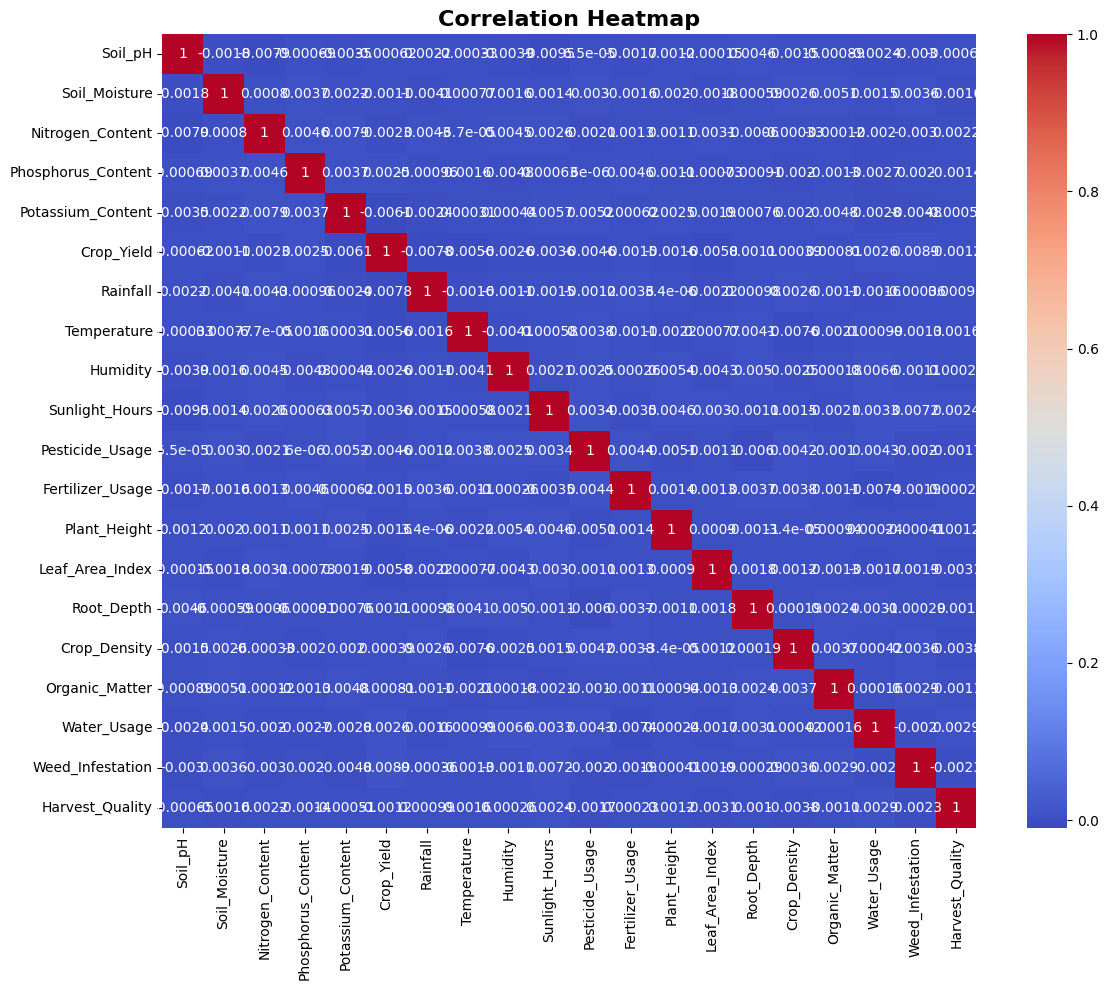

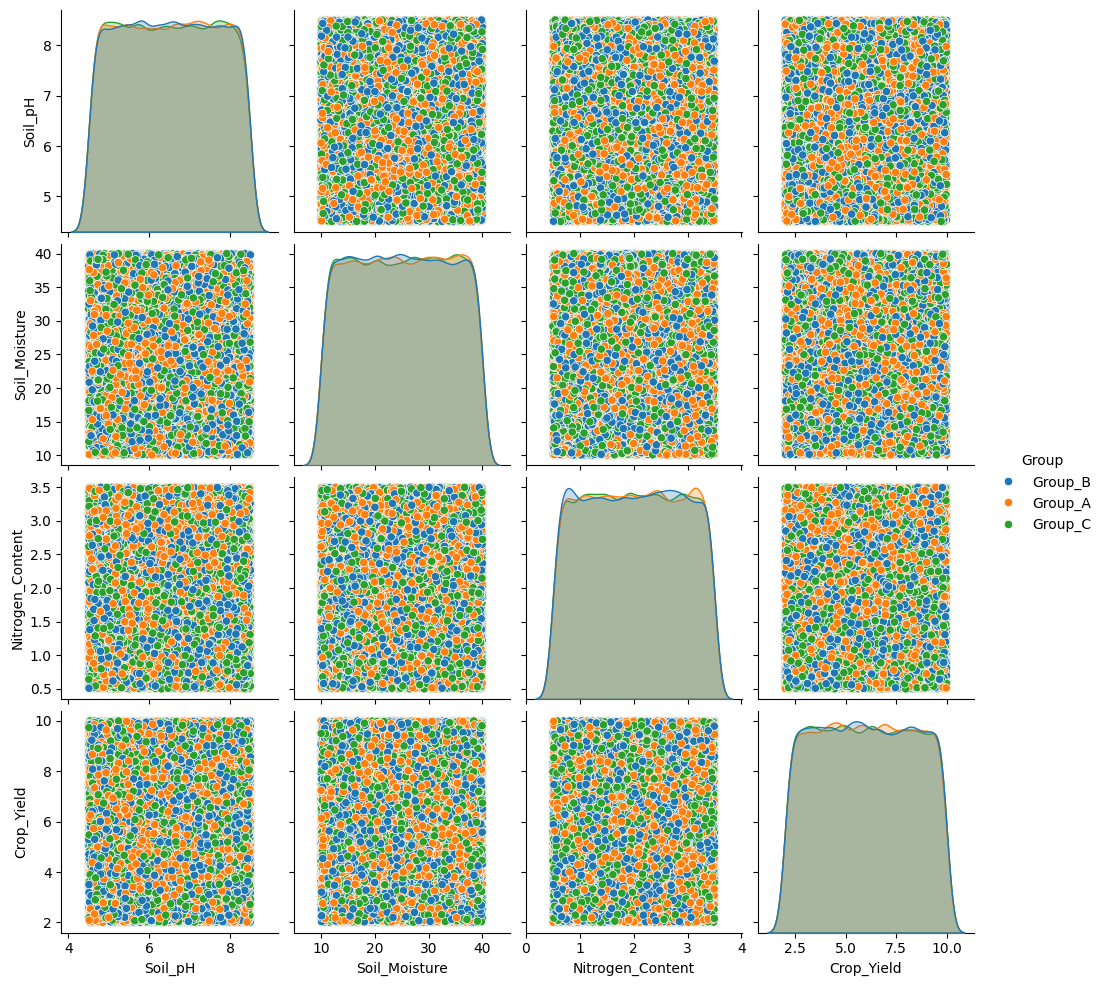

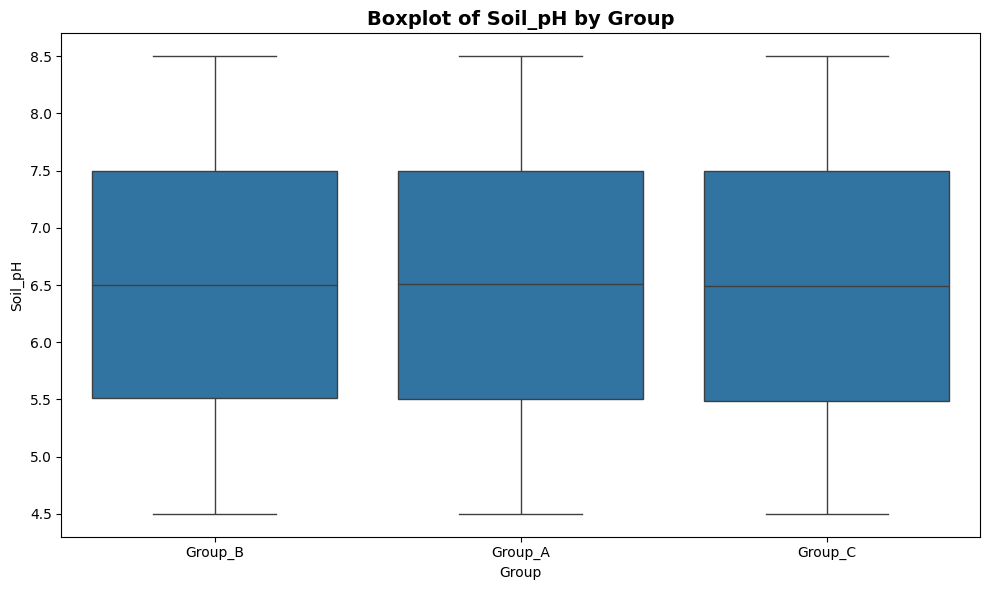

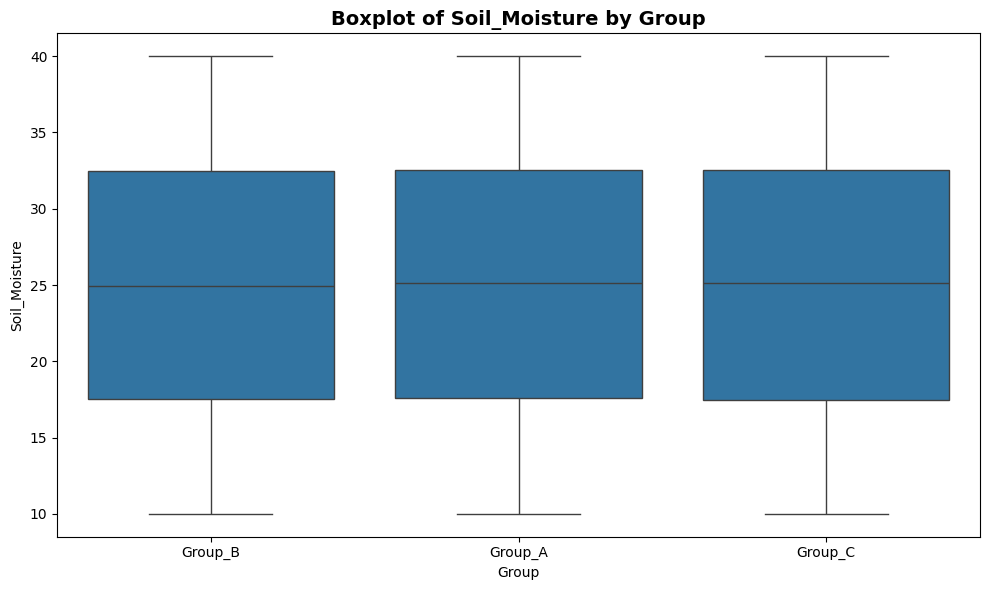

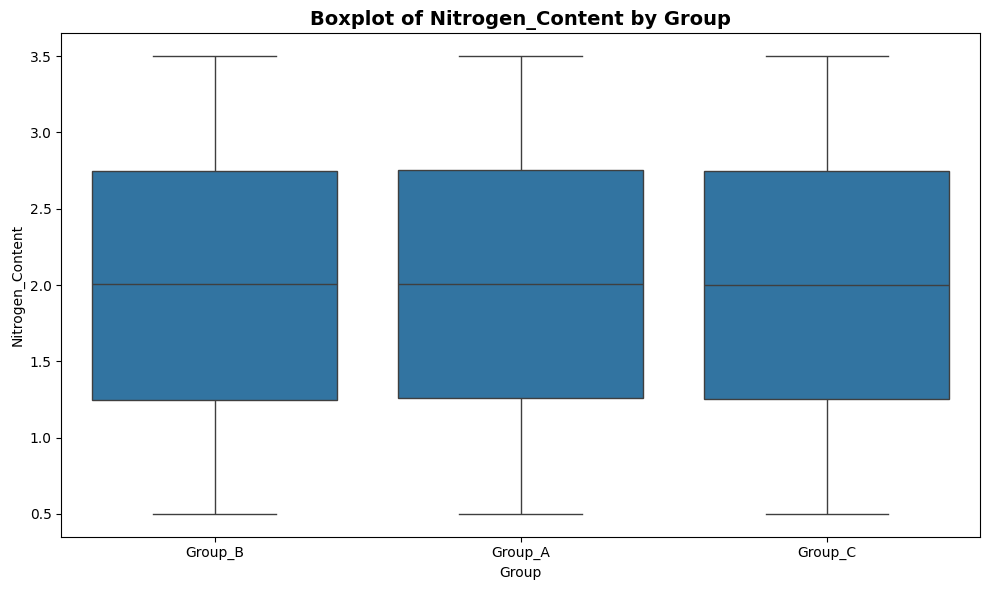

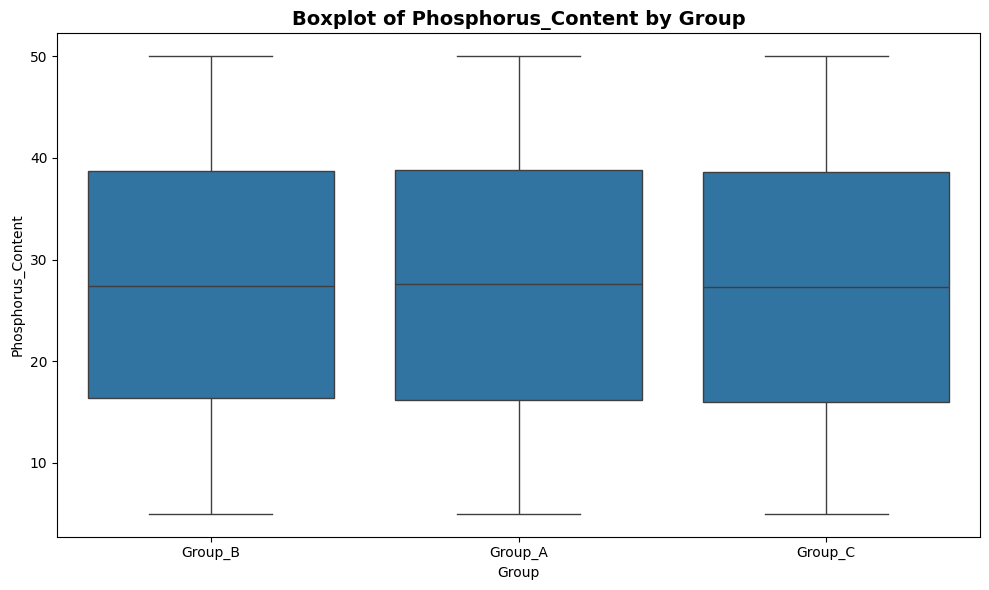

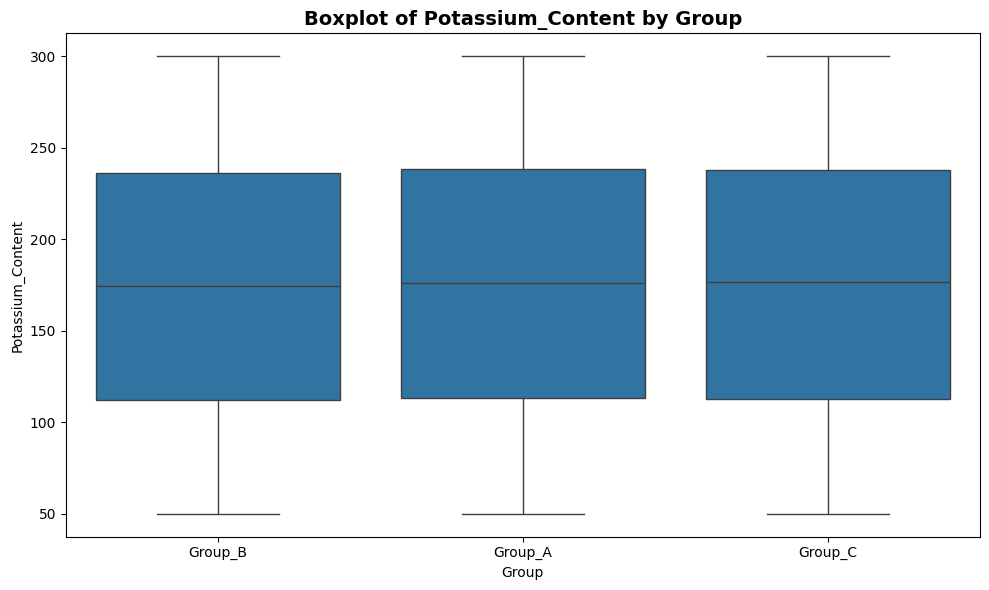

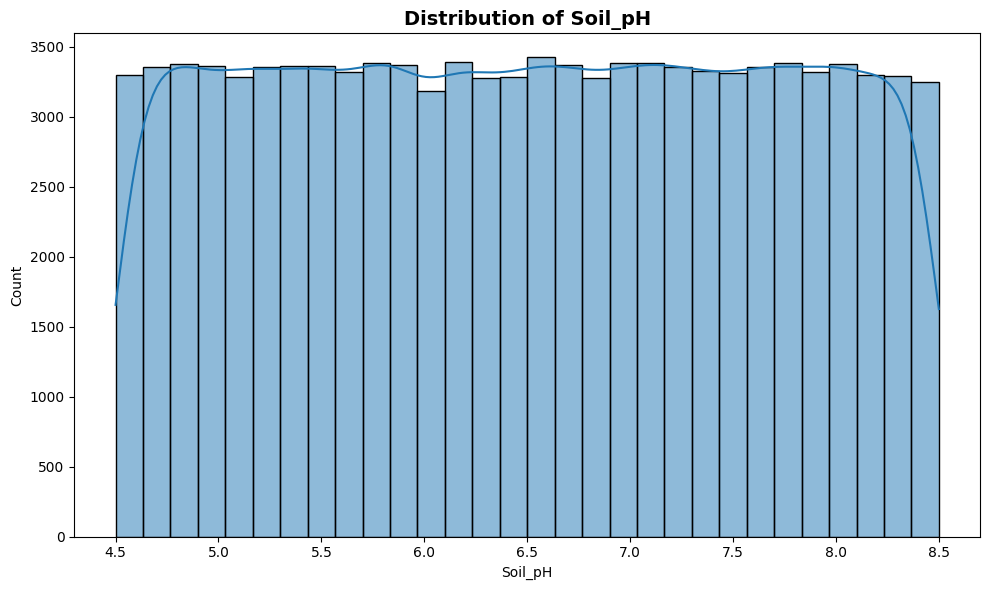

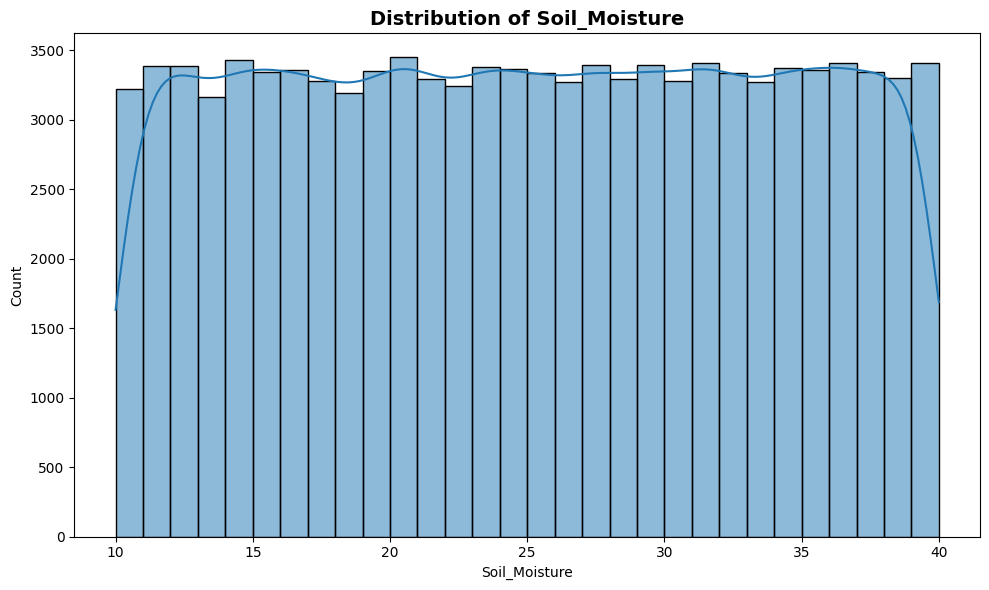

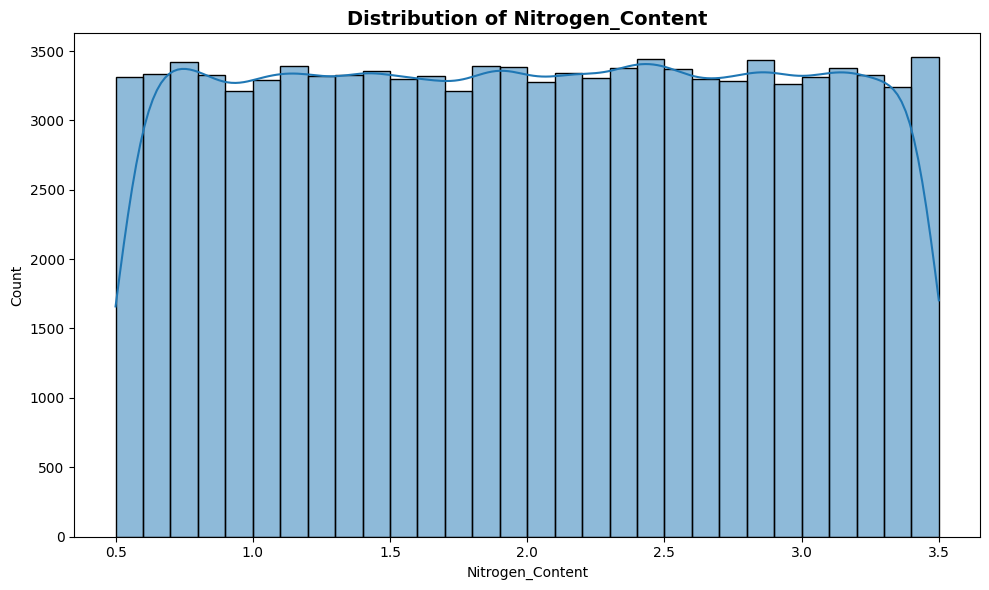

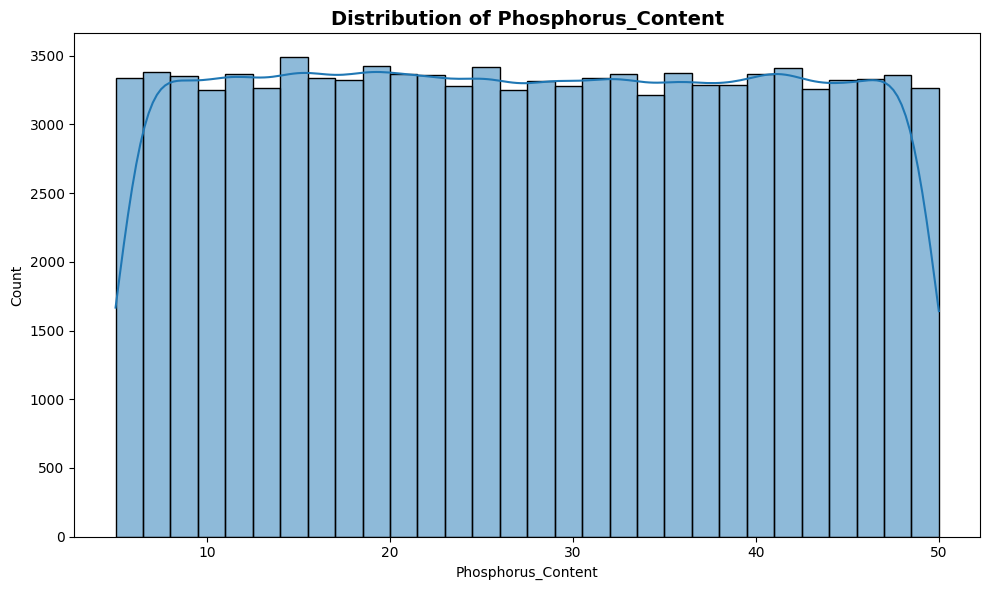

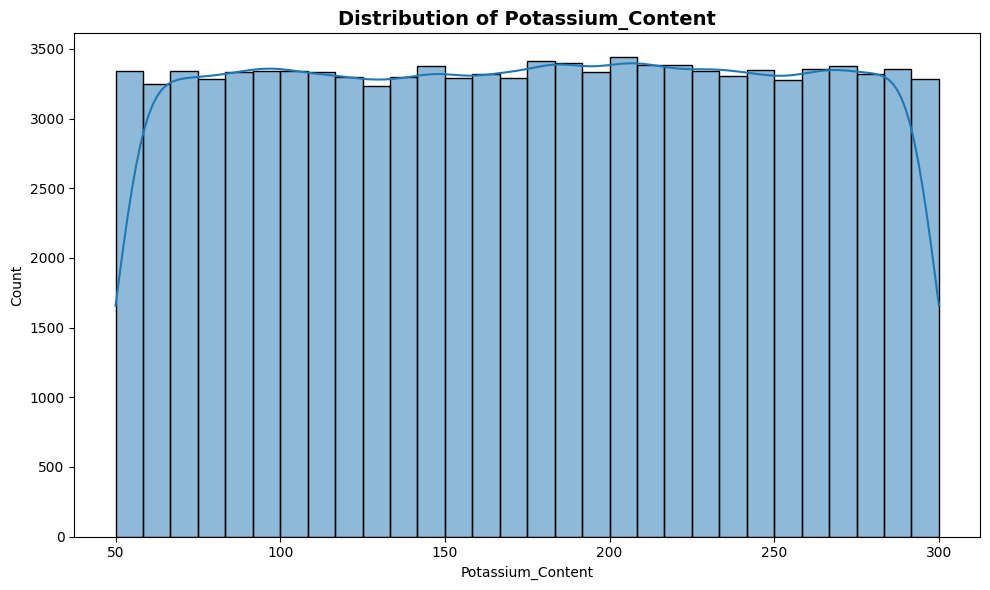

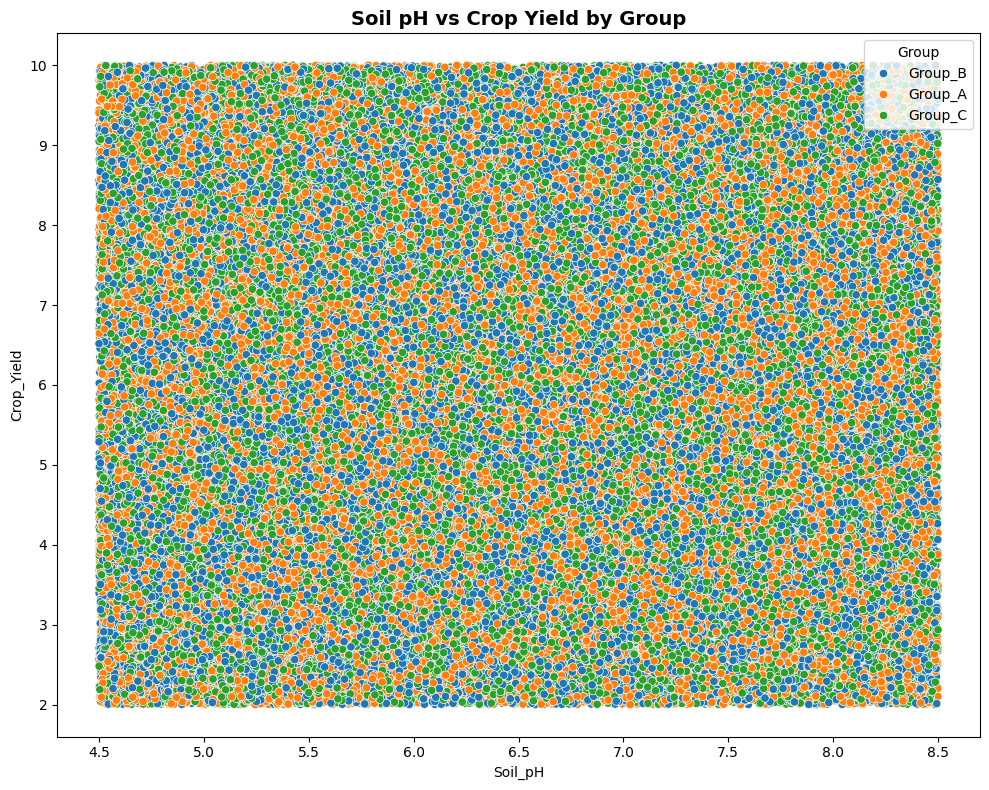


Interpretation Summary:
Wilks' lambda:
  - No significant difference observed.
  - p-value: 0.0708
----------------------------------------
  - This means the groups appear to be quite similar.
----------------------------------------
Pillai's trace:
  - No significant difference observed.
  - p-value: 0.0708
----------------------------------------
  - This means the groups appear to be quite similar.
----------------------------------------
Hotelling-Lawley trace:
  - No significant difference observed.
  - p-value: 0.0708
----------------------------------------
  - This means the groups appear to be quite similar.
----------------------------------------
Roy's greatest root:
  - Significant difference observed.
  - p-value: 0.0173
----------------------------------------
  - This means there is a notable difference between the groups.
----------------------------------------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Generate 1 Lakh Records 
def generate_data(filename, num_records=100000):
    np.random.seed(42)
    data = {
        'Soil_pH': np.random.uniform(4.5, 8.5, num_records),
        'Soil_Moisture': np.random.uniform(10, 40, num_records),
        'Nitrogen_Content': np.random.uniform(0.5, 3.5, num_records),
        'Phosphorus_Content': np.random.uniform(5, 50, num_records),
        'Potassium_Content': np.random.uniform(50, 300, num_records),
        'Crop_Yield': np.random.uniform(2, 10, num_records),
        'Rainfall': np.random.uniform(100, 1000, num_records),
        'Temperature': np.random.uniform(15, 35, num_records),
        'Humidity': np.random.uniform(20, 90, num_records),
        'Sunlight_Hours': np.random.uniform(4, 12, num_records),
        'Pesticide_Usage': np.random.uniform(0, 5, num_records),
        'Fertilizer_Usage': np.random.uniform(50, 200, num_records),
        'Plant_Height': np.random.uniform(30, 150, num_records),
        'Leaf_Area_Index': np.random.uniform(1, 6, num_records),
        'Root_Depth': np.random.uniform(10, 50, num_records),
        'Crop_Density': np.random.uniform(50, 200, num_records),
        'Organic_Matter': np.random.uniform(1, 5, num_records),
        'Water_Usage': np.random.uniform(100, 500, num_records),
        'Weed_Infestation': np.random.uniform(0, 10, num_records),
        'Harvest_Quality': np.random.uniform(1, 10, num_records),
    }
    df = pd.DataFrame(data)
    df['Group'] = np.random.choice(['Group_A', 'Group_B', 'Group_C'], size=num_records)
    df.to_csv(filename, index=False)
    print(f"Generated {num_records} records with 20 agricultural parameters and saved to {filename}")

# Step 2: Perform MANOVA
def perform_manova_analysis(input_file):
    data = pd.read_csv(input_file)
    formula = ' + '.join(data.columns[:-1]) + ' ~ Group'
    manova = MANOVA.from_formula(formula, data=data)
    result = manova.mv_test()
    print("\nMANOVA Results Summary:")
    print(result)
    return result, data

# Step 3: Generate Visualizations
def generate_visualizations(data):
    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Pairplot for selected features
    sns.pairplot(data[['Soil_pH', 'Soil_Moisture', 'Nitrogen_Content', 'Crop_Yield', 'Group']], hue='Group')
    plt.show()

    # Boxplots by Group
    for col in data.columns[:5]:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Group', y=col, data=data)
        plt.title(f'Boxplot of {col} by Group', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Distribution of selected columns
    for col in data.columns[:5]:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Scatterplot for Soil_pH vs Crop_Yield
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Soil_pH', y='Crop_Yield', hue='Group', data=data)
    plt.title('Soil pH vs Crop Yield by Group', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Step 4: Dynamic Interpretation Summary
def generate_interpretation_summary(result):
    print("\nInterpretation Summary:")
    p_values = result.results['Group']['stat'].iloc[:, -1]
    for i, (var, p_value) in enumerate(zip(result.results['Group']['stat'].index, p_values)):
        print(f"{var}:")
        if p_value < 0.05:
            print("  - Significant difference observed.")
        else:
            print("  - No significant difference observed.")
        print(f"  - p-value: {p_value:.4f}")
        print("-" * 40)

        # Simplified interpretation for layman
        if p_value < 0.05:
            print("  - This means there is a notable difference between the groups.")
        else:
            print("  - This means the groups appear to be quite similar.")
        print("-" * 40)

# Generate Data, Perform MANOVA, and Visualize Results
data_filename = 'agriculture_data.csv'
generate_data(data_filename)
result, data = perform_manova_analysis(data_filename)
generate_visualizations(data)
generate_interpretation_summary(result)
